In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | chicama
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | general pico
Processing Record 15 of Set 1 | faya
Processing Record 16 of Set 1 | mergui
City not found. Skipping...
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | barcelos
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Proc

Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | derzhavinsk
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | mattawa
Processing Record 44 of Set 4 | channel-port aux basques
Processing Record 45 of Set 4 | gillette
Processing Record 46 of Set 4 | owando
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | pundaguitan
Processing Record 1 of Set 5 | otane
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | puerto gaitan
Processing Record 4 of Set 5 | gat
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | rapid valley
Processing Record 7 of Set 5 | san rafael del sur
Processing Record 8 of Set 5 | inta
Processing Record 9 of Set 5 | imbituba
Processing Record 10 of Set 5 | souillac
Processing Record

Processing Record 28 of Set 8 | koutiala
Processing Record 29 of Set 8 | yamada
Processing Record 30 of Set 8 | cartagena del chaira
Processing Record 31 of Set 8 | arai
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | yantal
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | yerbogachen
Processing Record 38 of Set 8 | shahrud
Processing Record 39 of Set 8 | chernogorsk
Processing Record 40 of Set 8 | hof
Processing Record 41 of Set 8 | basco
Processing Record 42 of Set 8 | bilopillya
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | munsingen
Processing Record 45 of Set 8 | cabanas
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | viedma
Processing Record 49 of Set 8 | back mountain
Processing Record 50 of Set 8 | cabo san lucas
Processing Record 1 of Set 9 | marquette
Pr

City not found. Skipping...
Processing Record 23 of Set 12 | chiang kham
Processing Record 24 of Set 12 | skoghall
Processing Record 25 of Set 12 | cockburn town
Processing Record 26 of Set 12 | rorvik
Processing Record 27 of Set 12 | skelleftea
Processing Record 28 of Set 12 | inuvik
Processing Record 29 of Set 12 | roald
Processing Record 30 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 31 of Set 12 | tazovskiy
Processing Record 32 of Set 12 | kachiry
Processing Record 33 of Set 12 | gouyave
Processing Record 34 of Set 12 | lahaina
Processing Record 35 of Set 12 | kailua
Processing Record 36 of Set 12 | vrangel
Processing Record 37 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 12 | warwick
Processing Record 39 of Set 12 | methala
Processing Record 40 of Set 12 | mwinilunga
Processing Record 41 of Set 12 | adamas
Processing Record 42 of Set 12 | taitung
Processing Record 43 of Set 12 | blagoyevo
Processing Record 44 of Set 12 | araul

In [9]:
print(len(city_data))

579


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.72,70,40,1.99,US,2021-10-08 00:27:05
1,Sao Filipe,14.8961,-24.4956,79.65,79,21,4.43,CV,2021-10-08 00:27:05
2,Mataura,-46.1927,168.8643,59.49,52,99,4.25,NZ,2021-10-08 00:27:05
3,Narsaq,60.9167,-46.0500,44.82,54,70,6.53,GL,2021-10-08 00:27:06
4,Hithadhoo,-0.6000,73.0833,82.60,68,87,10.31,MV,2021-10-08 00:27:06
5,Hasaki,35.7333,140.8333,79.29,77,55,14.16,JP,2021-10-08 00:27:06
6,Chicama,-7.8447,-79.1469,59.54,84,99,8.79,PE,2021-10-08 00:27:07
7,East London,-33.0153,27.9116,66.74,94,100,4.27,ZA,2021-10-08 00:27:07
8,Jamestown,42.0970,-79.2353,71.24,78,20,1.01,US,2021-10-08 00:27:07
9,San Cristobal,7.7669,-72.2250,73.58,93,100,2.15,VE,2021-10-08 00:27:08


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-08 00:27:05,22.0752,-159.3190,82.72,70,40,1.99
1,Sao Filipe,CV,2021-10-08 00:27:05,14.8961,-24.4956,79.65,79,21,4.43
2,Mataura,NZ,2021-10-08 00:27:05,-46.1927,168.8643,59.49,52,99,4.25
3,Narsaq,GL,2021-10-08 00:27:06,60.9167,-46.0500,44.82,54,70,6.53
4,Hithadhoo,MV,2021-10-08 00:27:06,-0.6000,73.0833,82.60,68,87,10.31
5,Hasaki,JP,2021-10-08 00:27:06,35.7333,140.8333,79.29,77,55,14.16
6,Chicama,PE,2021-10-08 00:27:07,-7.8447,-79.1469,59.54,84,99,8.79
7,East London,ZA,2021-10-08 00:27:07,-33.0153,27.9116,66.74,94,100,4.27
8,Jamestown,US,2021-10-08 00:27:07,42.0970,-79.2353,71.24,78,20,1.01
9,San Cristobal,VE,2021-10-08 00:27:08,7.7669,-72.2250,73.58,93,100,2.15


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

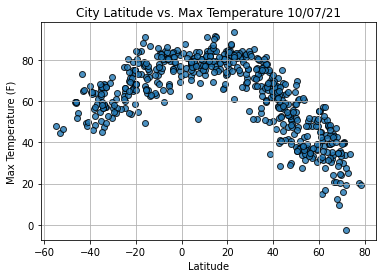

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

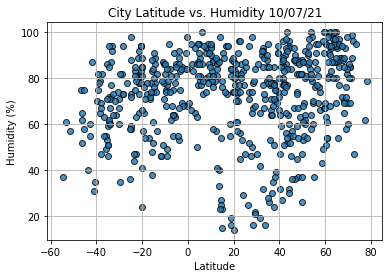

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

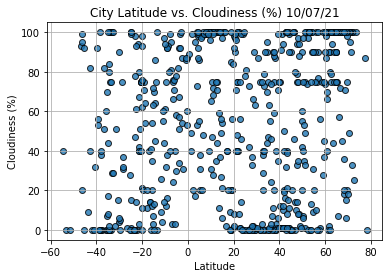

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

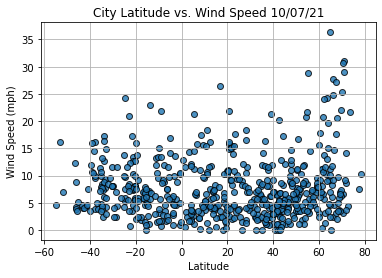

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()